In [1]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
scores = pl.read_csv("score.csv")

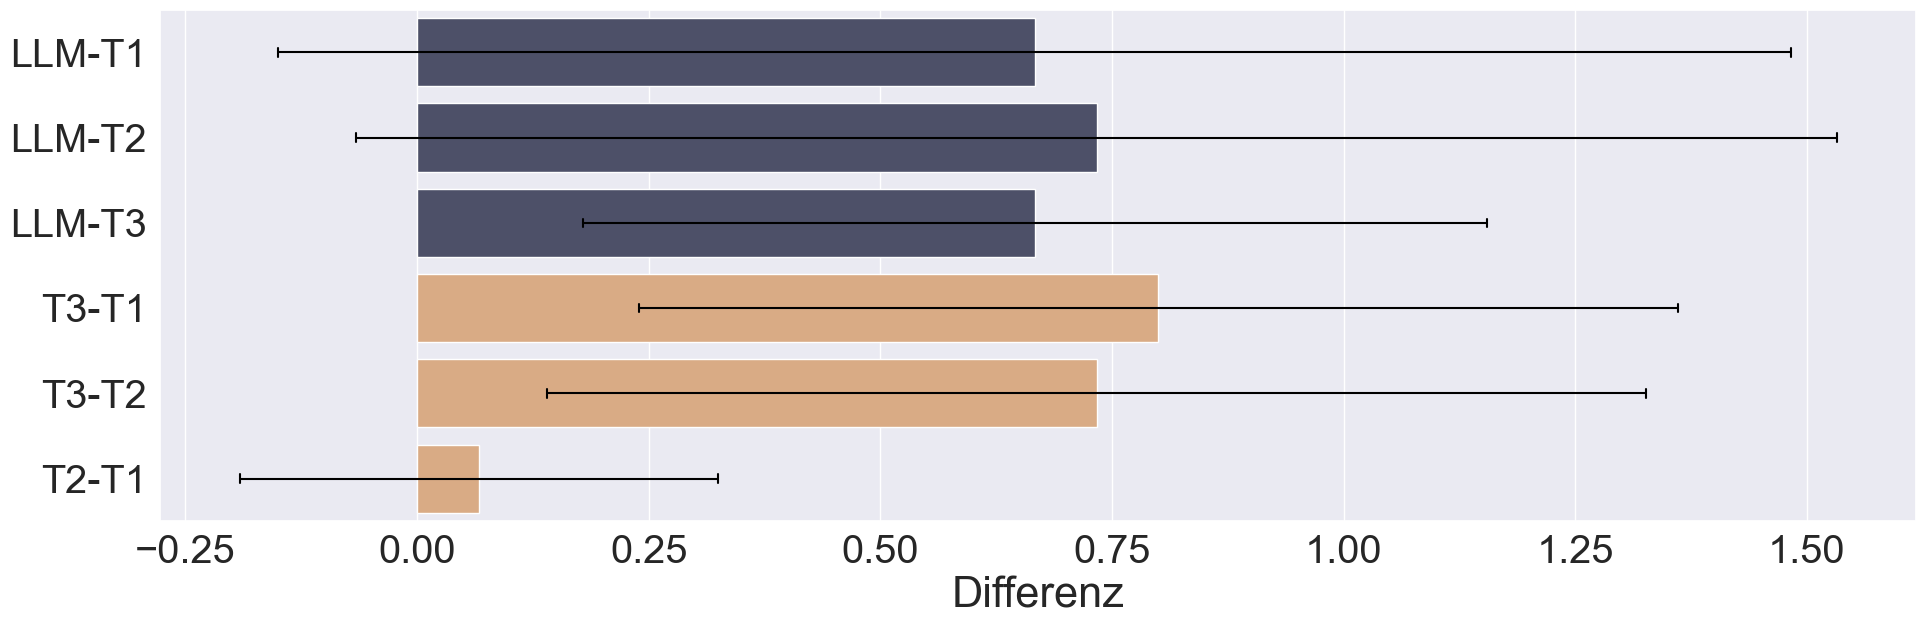

In [6]:
# Berechnung der Differenzen von LLM zu T1, T2, T3
df = scores.to_pandas()
# create new empty dataframe
new_df = pd.DataFrame()
# Berechnung der Differenzen zwischen allen Kombinationen
new_df["LLM-T1"] = np.abs(df["LLM"] - df["T1"])
new_df["LLM-T2"] = np.abs(df["LLM"] - df["T2"])
new_df["LLM-T3"] = np.abs(df["LLM"] - df["T3"])
new_df["T3-T1"] = np.abs(df["T3"] - df["T1"])
new_df["T3-T2"] = np.abs(df["T3"] - df["T2"])
new_df["T2-T1"] = np.abs(df["T2"] - df["T1"])

df_melt = new_df.melt(
    var_name="Comparison",   # Spalte mit den Namen der Vergleiche (LLM-T1 etc.)
    value_name="Difference"  # Spalte mit den entsprechenden Werten
)

sns.set_theme(style="darkgrid")
my_pal = {"LLM-T1": "#484D6D", 
          "LLM-T2": "#484D6D", 
          "LLM-T3": "#484D6D", 
          "T3-T1": "#E7A977", 
          "T3-T2": "#E7A977", 
          "T2-T1": "#E7A977"
          }
sns.set(font_scale=2.6)
# Visualisierung: Balkendiagramm für Mittelwerte der Differenzen
plt.figure(figsize=(20, 7))
sns.barplot(data=df_melt, 
            x="Difference", 
            y="Comparison", 
            palette=my_pal,
            errorbar="sd",
            capsize=0.1,
            errwidth=1.5,
            errcolor="black")
        
plt.ylabel("")
plt.xlabel("Differenz")
plt.tight_layout()
plt.show()



In [4]:
max_diff = 2  # Falls dein Rating 0..2 beträgt
df_melt["Agreement"] = 1 - (df_melt["Difference"] / max_diff)
df_melt["Agreement"] = df_melt["Agreement"] * 100  # in %

# Beispiel: wir definieren die jeweiligen Sets
trainer_llm_comps = ["LLM-T1", "LLM-T2", "LLM-T3"]
trainer_trainer_comps = ["T3-T1", "T3-T2", "T2-T1"]


# DataFrame-Auswahl für trainer-trainer
df_tt = df_melt[df_melt["Comparison"].isin(trainer_trainer_comps)]

# DataFrame-Auswahl für trainer-LLM
df_tllm = df_melt[df_melt["Comparison"].isin(trainer_llm_comps)]


mean_tt   = df_tt["Agreement"].mean()
mean_tllm = df_tllm["Agreement"].mean()

print(f"Durchschnittliche Übereinstimmung Trainer–Trainer: {mean_tt:.2f}%")
print(f"Durchschnittliche Übereinstimmung Trainer–LLM:     {mean_tllm:.2f}%")



Durchschnittliche Übereinstimmung Trainer–Trainer: 73.33%
Durchschnittliche Übereinstimmung Trainer–LLM:     65.56%
